In [1]:
# machine learning
import keras
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

# numerical python
import numpy as np

# plotting
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [6]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = np.expand_dims(X_train, axis=3)
X_test = np.expand_dims(X_test, axis=3)

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [9]:
def define_model():
    model = Sequential()
    model.add(Conv2D(filters = 30, kernel_size = (5, 5), input_shape=(28, 28, 1), activation='relu', padding = 'same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(15, (3, 3), activation='relu', padding = 'same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(10, activation='sigmoid'))
    return model

def compile_model(model):
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


# build the model
model = define_model()
compile_model(model)

In [10]:
# use this in a terminal cd'd to folder of this notebook:
#    tensorboard --logdir Graphs

# add a tensorboard callback object
tbCallBack = keras.callbacks.TensorBoard(log_dir='./Graphs', histogram_freq=0, write_graph=True, write_images=True)

# Fit the model
history = model.fit(X_train, y_train, validation_split = .2, epochs=5, batch_size=200, callbacks=[tbCallBack])

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 33s 682us/step - loss: 0.5634 - acc: 0.8338 - val_loss: 0.1852 - val_acc: 0.9487
Epoch 2/5
48000/48000 [==============================] - 33s 679us/step - loss: 0.1510 - acc: 0.9548 - val_loss: 0.1120 - val_acc: 0.9683
Epoch 3/5
48000/48000 [==============================] - 33s 688us/step - loss: 0.1024 - acc: 0.9697 - val_loss: 0.0861 - val_acc: 0.9743
Epoch 4/5
48000/48000 [==============================] - 40s 832us/step - loss: 0.0804 - acc: 0.9759 - val_loss: 0.0749 - val_acc: 0.9772
Epoch 5/5
48000/48000 [==============================] - 34s 705us/step - loss: 0.0683 - acc: 0.9787 - val_loss: 0.0686 - val_acc: 0.9797


In [11]:
# save the model
model.save("Models/mnist_model.h5")

In [12]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))
print("Error: %.2f%%" % (100-scores[1]*100))

Accuracy: 98.13%
Error: 1.87%


prediction: 0, label: 0


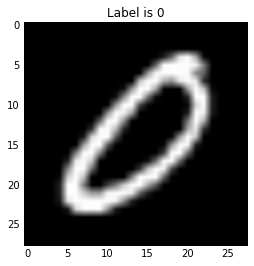

In [20]:
# predictions
test_num = 192

prediction = model.predict_classes(np.expand_dims(X_test[test_num], 0))[0]
label = np.argmax(y_test[test_num])
print("prediction: ", prediction, ", label: ", label, sep = "")
 # Plot
plt.title('Label is {label}'.format(label=label))
plt.imshow(X_test[test_num][:,:,0], cmap='gray')
plt.show()


In [5]:
# load the model
model = load_model("Models/mnist_model.h5")

TypeError: ('Keyword argument not understood:', 'data_format')